In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics

In [2]:
data = 'train.csv' 

In [3]:
houses = pd.read_csv('./datasets/' + data)

In [4]:
houses.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
houses.shape

(2051, 81)

In [6]:
#im going to clean up the columns reql quick
houses.columns = [x.lower() for x in houses.columns]
houses.columns = [x.replace(' ', '_') for x in houses.columns]

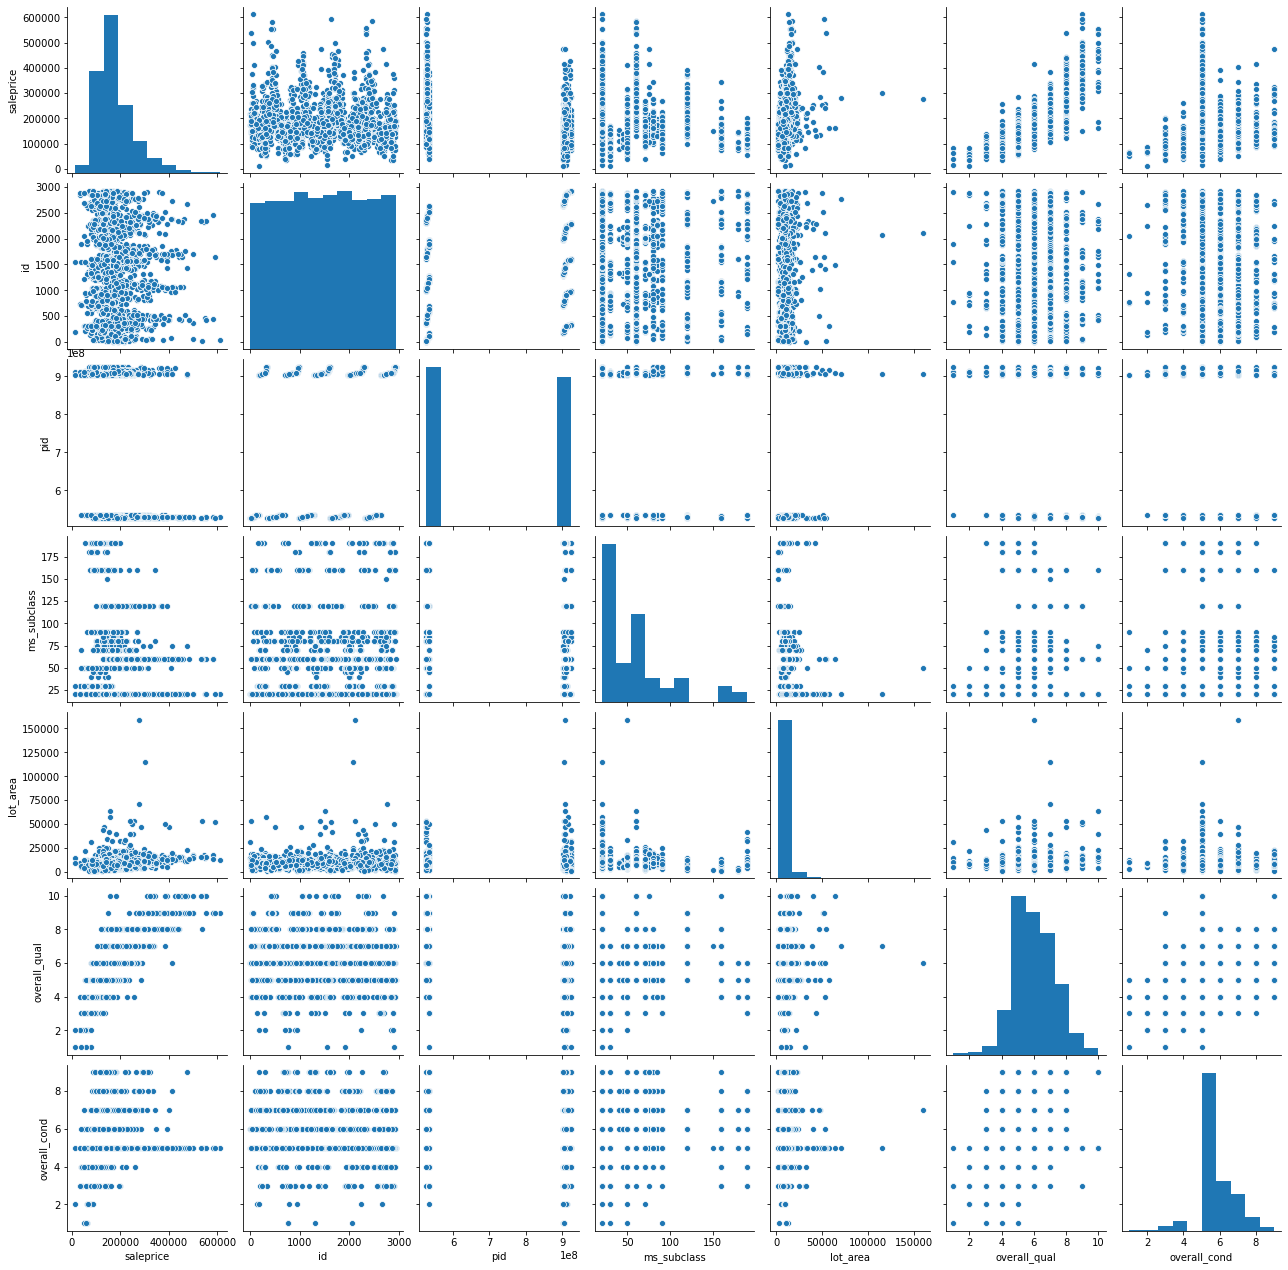

In [7]:
# sns.pairplot(houses[['saleprice', 'id', 'pid', 'ms_subclass', 'lot_area', 'overall_qual', 'overall_cond']])

In [8]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [27]:

null_counts = houses.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [10]:
houses.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [11]:
houses = houses.fillna(0) # I looked at most of the data and the values that are null appear to represent a lack of these features so i turned them into zeros

In [12]:
houses.corr()['saleprice'] # id, bsmtfin_sf_2, low_qual_fin_sf, bsmt_half_bath, 3ssn_porch, pool_area, misc_val, mo_sold, yr_sold 
#dont appear to have very strong correlation with sale price so we should consider dropping them

id                -0.051398
pid               -0.255052
ms_subclass       -0.087335
lot_frontage       0.181456
lot_area           0.296566
overall_qual       0.800207
overall_cond      -0.097019
year_built         0.571849
year_remod/add     0.550370
mas_vnr_area       0.503579
bsmtfin_sf_1       0.423856
bsmtfin_sf_2       0.016432
bsmt_unf_sf        0.190861
total_bsmt_sf      0.629303
1st_flr_sf         0.618486
2nd_flr_sf         0.248452
low_qual_fin_sf   -0.041594
gr_liv_area        0.697038
bsmt_full_bath     0.283332
bsmt_half_bath    -0.045290
full_bath          0.537969
half_bath          0.283001
bedroom_abvgr      0.137067
kitchen_abvgr     -0.125444
totrms_abvgrd      0.504014
fireplaces         0.471093
garage_yr_blt      0.258645
garage_cars        0.647781
garage_area        0.649897
wood_deck_sf       0.326490
open_porch_sf      0.333476
enclosed_porch    -0.135656
3ssn_porch         0.048732
screen_porch       0.134581
pool_area          0.023106
misc_val          -0

# plt.figure(figsize = [12, 12])
plt.scatter(houses_training['SalePrice'], houses_training['Lot Area'], c = 'pink') # there appear to be two pretty heavy outliars so we remove those

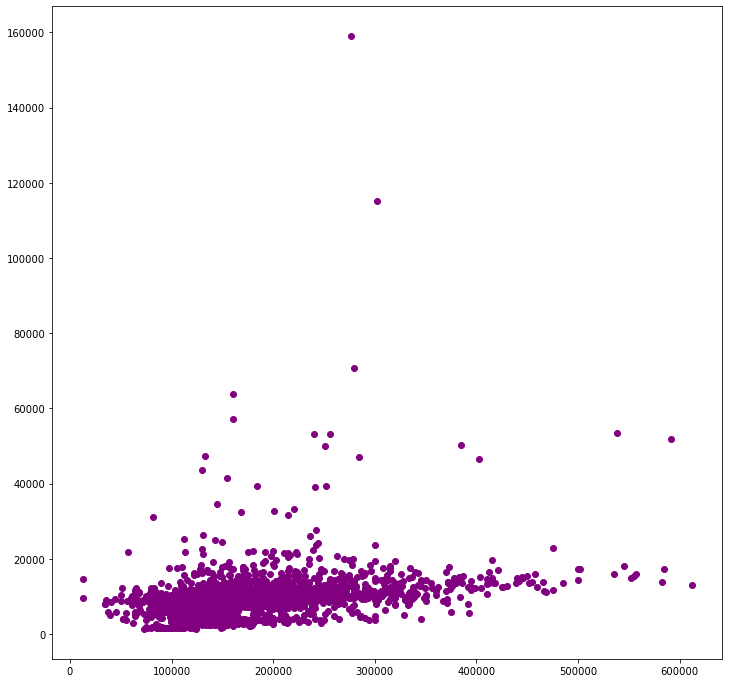

In [13]:
plt.figure(figsize = [12, 12])
plt.scatter(houses['Sale Price'], houses['lot_area'], c = 'purple')  # looks a bit better now 

In [14]:
houses = houses[houses.lot_area <= 60000] # handles a lot of the size based outliers

In [15]:
houses.shape

(2047, 81)

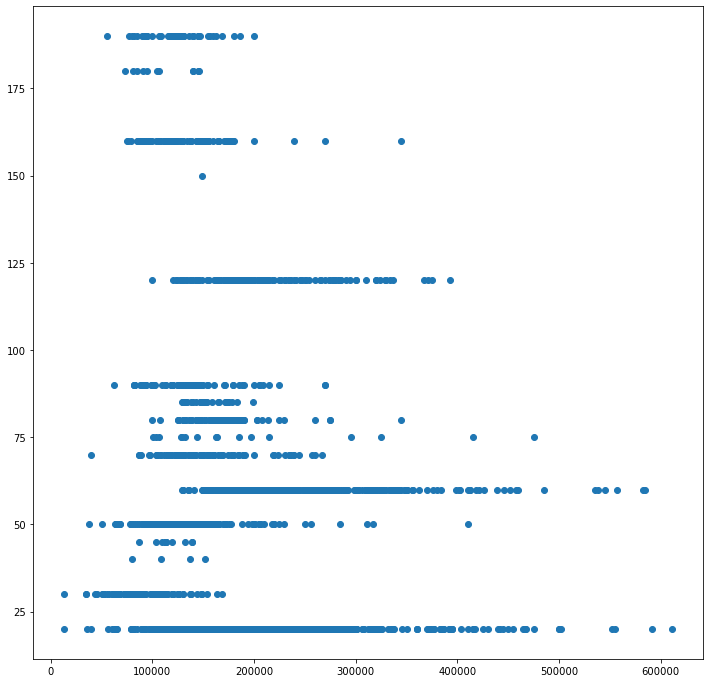

In [16]:
plt.figure(figsize = [12, 12])
plt.scatter(houses.saleprice, houses.ms_subclass)

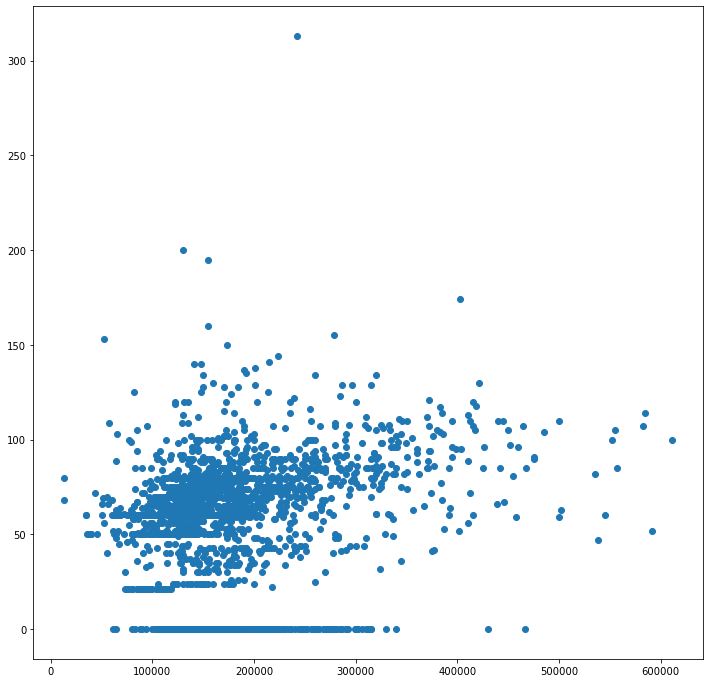

In [17]:
plt.figure(figsize = [12, 12])
plt.scatter(houses.saleprice, houses.lot_frontage) # doesnt seem like it is too coorelated might drop later

In [18]:
houses = houses.drop(columns = ['id',
                                'mo_sold',
                                'yr_sold', 
                                'bsmtfin_sf_2',
                                'pool_qc', 
                                'misc_feature',
                                'lot_shape',
                                'land_contour',
                                'land_slope',
                                'misc_val', 
                                '3ssn_porch', 
                                'electrical', 
                                'condition_1', 
                                'condition_2', 
                                'garage_cars', 
                                'pool_area', 
                                'alley'])

In [19]:
houses.corr()['saleprice']

pid               -0.257496
ms_subclass       -0.086209
lot_frontage       0.187986
lot_area           0.354190
overall_qual       0.802434
overall_cond      -0.097352
year_built         0.573212
year_remod/add     0.550707
mas_vnr_area       0.505621
bsmtfin_sf_1       0.438234
bsmt_unf_sf        0.190698
total_bsmt_sf      0.650413
1st_flr_sf         0.631221
2nd_flr_sf         0.249752
low_qual_fin_sf   -0.041454
gr_liv_area        0.710107
bsmt_full_bath     0.283943
bsmt_half_bath    -0.047400
full_bath          0.537596
half_bath          0.285200
bedroom_abvgr      0.137964
kitchen_abvgr     -0.125244
totrms_abvgrd      0.507983
fireplaces         0.471258
garage_yr_blt      0.258615
garage_area        0.653713
wood_deck_sf       0.325876
open_porch_sf      0.335034
enclosed_porch    -0.135171
screen_porch       0.135290
saleprice          1.000000
Name: saleprice, dtype: float64

In [20]:
objects = [x for x in houses.columns if houses[x].dtype == object]

In [21]:
houses =  pd.get_dummies(houses, columns = objects, drop_first = True)

In [22]:
X = houses.drop(columns = 'saleprice')
y = houses['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

In [23]:
lr = LinearRegression().fit(X_train, y_train)

In [24]:
cross_val_score(lr, X_test, y_test, cv=50).mean()

0.8882265235585521

In [25]:
r_alphas = np.logspace(0, 5, 100)
ridge = RidgeCV(alphas=r_alphas, scoring = 'r2', cv= 5).fit(X_train, y_train);
ridge.score(X_train, y_train)

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.28547e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.27417e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22648e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9568e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.37384e-20): result may n

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.11319e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.10752e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.69046e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.47177e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.38638e-20): result may 

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09973e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24416e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22674e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21655e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24835e-19): result may 

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.98367e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.08163e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.1038e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.58341e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.61404e-19): result may n

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.65791e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64715e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.67074e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.69584e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.89894e-18): result may 

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.01497e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.77525e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.81259e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.77165e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.80895e-18): result may 

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87253e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74201e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75925e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9558e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.94137e-17): result may n

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.64236e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.60406e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.68494e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.64938e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.67776e-17): result may 

0.9146213726343998

In [26]:
ridge.predict(y)

ValueError: Expected 2D array, got 1D array instead:
array=[130500 220000 109000 ... 177000 144000 189000].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [28]:
l_alphas = (0, 3, 100)
lasso = LassoCV(alphas = l_alphas, cv = 5).fit(X_train, y_train)
cross_val_score(lasso, X_test, y_test, cv = 10).mean()

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203168637541.59222, tolerance: 522121282.7341189
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196841622871.52734, tolerance: 522121282.7341189
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You mi

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104639707162.92386, tolerance: 495109582.23299944
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100210963498.42383, tolerance: 495109582.23299944
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You 

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97274403537.41992, tolerance: 456639992.6823466
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93032638500.47754, tolerance: 456639992.6823466
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106481114906.20639, tolerance: 496005690.20055556
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102203896441.75879, tolerance: 496005690.20055556
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You 

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100642342096.88037, tolerance: 458916896.20869875
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123192435872.35417, tolerance: 419025388.39580977
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lea

C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104822333832.50293, tolerance: 497380740.6704442
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128345691282.45189, tolerance: 457456757.8836549
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Jonathan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead 

0.9050611100241168